# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [2]:
from numpy import * #Load all the numpy packages


### A Note About "import as"

    import * 
This loads all submodules. Note: this is a waste of memory when incorporated into deployed code. 
We'll use it here by example - it's fine to use for learning purposes and legibility.

As we'll see later, the proper convention is to use:

    import numpy as np
    
And then to specifically call needed methods:

![](http://note.io/1juA60F)

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [61]:
# Creating arrays #what is the default type?
a = zeros((3)) 
b = ones((2,3))
c = random.randint(1,10,(2,3,4))
d = arange(0,11,1)
e = empty(3)
e

What are these functions?

    arange?
    empty?

In [4]:
# Note the way each array is printed:
a,b,c,d


(array([ 0.,  0.,  0.]), array([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]), array([[[6, 2, 7, 8],
         [1, 1, 1, 6],
         [1, 4, 2, 1]],
 
        [[4, 8, 1, 2],
         [2, 4, 5, 2],
         [5, 7, 4, 3]]]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [12]:
#Wrong_Array = array(1,2,3,4)    # WRONG
Right_Array = array([1,2,3,4])  # RIGHT
print(Right_Array.dtype)
Right_Array

int32


array([1, 2, 3, 4])

In [4]:
## Arithmetic in arrays is element wise

In [5]:
 a = array( [20,30,40,50] )
 b = arange( 4 )
 b

array([0, 1, 2, 3])

In [6]:
 c = a-b #vectorization and broadcasting
 c
#Vectorization describes the absence of any explicit looping, indexing, etc., in the code
#Broadcasting is the term used to describe the implicit element-by-element behavior of operations

array([20, 29, 38, 47])

In [ ]:
 b**2

In [86]:
a = arange(10)**3
print(a)
a[:6:2] = -1000    # equivalent to a[0:6:2] = -1000; from start to position 6, exclusive, set every 2nd element to -1000
print(a)
print(a[ : : -1])                                 # reversed a

[  0   1   8  27  64 125 216 343 512 729]
[-1000     1 -1000    27 -1000   125   216   343   512   729]
[  729   512   343   216   125 -1000    27 -1000     1 -1000]


In [111]:
a = arange(9).reshape(3,3)**3
print(a)
print(a[ : : -1])
print(a.flat[::-1].reshape(3,3)) #equivalent to print(a.reshape(9)[::-1].reshape(3,3))

[[  0   1   8]
 [ 27  64 125]
 [216 343 512]]
[[216 343 512]
 [ 27  64 125]
 [  0   1   8]]
[[512 343 216]
 [125  64  27]
 [  8   1   0]]


## Indexing, Slicing and Iterating

In [20]:
# one-dimensional arrays work like lists:
a = arange(10)**2

In [21]:
a

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [22]:
a[2:5]

array([ 4,  9, 16])

In [23]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [57]:
b = random.randint(1,100,(4,4))

In [58]:
b

array([[ 5, 32,  2, 14],
       [84,  5, 92, 60],
       [68,  8, 50, 48],
       [66, 62, 15, 56]])

In [60]:
# Guess the output
print(b[2,3])
print(b[0,0])
print(b.min())
print(b.sum())
print(b[1,:].max())
print(b[:,3].min())

48
5
2
667
92
14
[[ 5 32  2 14]
 [84  5 92 60]
 [68  8 50 48]
 [66 62 15 56]]


In [31]:
b[0:3,1],b[:,1]

(array([48, 35, 87]), array([48, 35, 87, 30]))

In [32]:
b[1:3,:]

array([[98, 35, 34, 19],
       [18, 87, 70, 40]])

In [48]:
b = arange(12).reshape(3,4)
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [51]:
b.sum(axis=0)

array([12, 15, 18, 21])

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dates = pd.date_range('20140101',periods=6)
dates

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
# Index, columns, underlying numpy data
df.T
df2 = df.T
df2

,2014-01-01 00:00:00,2014-01-02 00:00:00,2014-01-03 00:00:00,2014-01-04 00:00:00,2014-01-05 00:00:00,2014-01-06 00:00:00
A,-0.044554,-0.328918,0.709701,-0.085721,-0.155521,0.926138
B,-0.208466,0.009432,-1.790627,1.045805,-1.303760,2.557357
C,-0.477097,2.535536,0.915767,0.678600,1.933158,0.756118
D,-0.356064,-1.072676,-0.103496,0.327477,-0.133077,1.045876


In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,3,foo
1,1.0,2013-01-02,1.0,3,foo
2,1.0,2013-01-02,1.0,3,foo
3,1.0,2013-01-02,1.0,3,foo


In [19]:
# With specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E            object
dtype: object

#### Viewing Data

In [20]:
df.head()

,A,B,C,D
2014-01-01,0.731803,2.318341,-0.126191,-0.903675
2014-01-02,0.161877,-0.892566,0.967681,-1.514520
2014-01-03,0.776626,1.797420,0.916972,0.634322
2014-01-04,2.020242,-0.763612,1.239145,-0.919727
2014-01-05,0.772058,0.417369,-0.957359,-0.916665


In [21]:
df.tail()

,A,B,C,D
2014-01-02,0.161877,-0.892566,0.967681,-1.514520
2014-01-03,0.776626,1.797420,0.916972,0.634322
2014-01-04,2.020242,-0.763612,1.239145,-0.919727
2014-01-05,0.772058,0.417369,-0.957359,-0.916665
2014-01-06,-1.670217,-3.249906,2.017370,1.674340


In [158]:
df.index

DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05', '2014-01-06'],
              dtype='datetime64[ns]', freq='D')

In [160]:
df[:].describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.193446,-0.304108,-0.193669,-0.192639
std,1.336287,0.439795,0.421410,0.940785
min,-1.601691,-1.146701,-0.902226,-1.298144
25%,-0.328726,-0.308016,-0.264763,-0.825310
50%,-0.043149,-0.210842,-0.182395,-0.393827
75%,0.658202,-0.052754,-0.035727,0.494541
max,2.380595,0.084201,0.384058,1.108439


In [14]:
df.sort_values(by='B')
df

,A,B,C,D
2014-01-01,-0.044554,-0.208466,-0.477097,-0.356064
2014-01-02,-0.328918,0.009432,2.535536,-1.072676
2014-01-03,0.709701,-1.790627,0.915767,-0.103496
2014-01-04,-0.085721,1.045805,0.678600,0.327477
2014-01-05,-0.155521,-1.303760,1.933158,-0.133077
2014-01-06,0.926138,2.557357,0.756118,1.045876


### Selection

In [174]:
df[['A','B']]

,A,B
2014-01-01,0.042588,-0.024085
2014-01-02,-1.601691,-0.138763
2014-01-03,-0.128886,-0.282922
2014-01-04,2.380595,-1.146701
2014-01-05,0.863406,-0.316381
2014-01-06,-0.395339,0.084201


In [165]:
df[0:3]

,A,B,C,D
2014-01-01,0.042588,-0.024085,0.384058,-0.049092
2014-01-02,-1.601691,-0.138763,0.012086,-1.298144
2014-01-03,-0.128886,-0.282922,-0.179168,0.675752


In [166]:
# By label
df.loc[dates[0]]

A    0.042588
B   -0.024085
C    0.384058
D   -0.049092
Name: 2014-01-01 00:00:00, dtype: float64

In [167]:
# multi-axis by label
df.loc[:,['A','B']]

,A,B
2014-01-01,0.042588,-0.024085
2014-01-02,-1.601691,-0.138763
2014-01-03,-0.128886,-0.282922
2014-01-04,2.380595,-1.146701
2014-01-05,0.863406,-0.316381
2014-01-06,-0.395339,0.084201


In [168]:
# Date Range
df.loc['20140102':'20140104',['B']]

,B
2014-01-02,-0.138763
2014-01-03,-0.282922
2014-01-04,-1.146701


In [176]:
# Fast access to scalar
df.at[dates[1],'B']

-0.13876256595723918

In [189]:
# iloc provides integer locations similar to np style
df.iloc[3:]

,A,B,C,D
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226
2014-01-05,0.863406,-0.316381,-0.902226,-0.738562
2014-01-06,-0.395339,0.084201,-0.185622,1.108439


### Boolean Indexing

In [42]:
df[df.A < 0] # Basically a 'where' operation

,A,B,C,D
2014-01-06,-1.670217,-3.249906,2.01737,1.67434


### Setting

In [186]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [187]:
df_posA

,A,B,C,D
2014-01-01,0.042588,-0.024085,0.384058,-0.049092
2014-01-02,1.601691,0.138763,-0.012086,1.298144
2014-01-03,0.128886,0.282922,0.179168,-0.675752
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226
2014-01-05,0.863406,-0.316381,-0.902226,-0.738562
2014-01-06,0.395339,-0.084201,0.185622,-1.108439


In [190]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [191]:
s1

2014-01-02    1
2014-01-03    2
2014-01-04    3
2014-01-05    4
2014-01-06    5
2014-01-07    6
Freq: D, dtype: int64

In [192]:
df['F'] = s1

In [193]:
df

,A,B,C,D,F
2014-01-01,0.042588,-0.024085,0.384058,-0.049092,NaN
2014-01-02,-1.601691,-0.138763,0.012086,-1.298144,1.0
2014-01-03,-0.128886,-0.282922,-0.179168,0.675752,2.0
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226,3.0
2014-01-05,0.863406,-0.316381,-0.902226,-0.738562,4.0
2014-01-06,-0.395339,0.084201,-0.185622,1.108439,5.0


### Missing Data

In [194]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2014-01-01,0.042588,-0.024085,0.384058,-0.049092,NaN,NaN
2014-01-02,-1.601691,-0.138763,0.012086,-1.298144,1.0,NaN
2014-01-03,-0.128886,-0.282922,-0.179168,0.675752,2.0,NaN
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226,3.0,NaN


In [195]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [196]:
df1

,A,B,C,D,F,E
2014-01-01,0.042588,-0.024085,0.384058,-0.049092,NaN,1.0
2014-01-02,-1.601691,-0.138763,0.012086,-1.298144,1.0,1.0
2014-01-03,-0.128886,-0.282922,-0.179168,0.675752,2.0,NaN
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226,3.0,NaN


In [197]:
# find where values are null
pd.isnull(df1)

,A,B,C,D,F,E
2014-01-01,False,False,False,False,True,False
2014-01-02,False,False,False,False,False,False
2014-01-03,False,False,False,False,False,True
2014-01-04,False,False,False,False,False,True


### Operations

In [198]:
df.describe()

,A,B,C,D,F
count,6.000000,6.000000,6.000000,6.000000,5.000000
mean,0.193446,-0.304108,-0.193669,-0.192639,3.000000
std,1.336287,0.439795,0.421410,0.940785,1.581139
min,-1.601691,-1.146701,-0.902226,-1.298144,1.000000
25%,-0.328726,-0.308016,-0.264763,-0.825310,2.000000
50%,-0.043149,-0.210842,-0.182395,-0.393827,3.000000
75%,0.658202,-0.052754,-0.035727,0.494541,4.000000
max,2.380595,0.084201,0.384058,1.108439,5.000000


In [207]:
df.mean(),df.mean(1) # Operation on two different axes

(A    0.193446
 B   -0.304108
 C   -0.193669
 D   -0.192639
 F    3.000000
 dtype: float64, 2014-01-01    0.088367
 2014-01-02   -0.405302
 2014-01-03    0.416955
 2014-01-04    0.617705
 2014-01-05    0.581247
 2014-01-06    1.122336
 Freq: D, dtype: float64)

### Applying functions

In [208]:
df

,A,B,C,D,F
2014-01-01,0.042588,-0.024085,0.384058,-0.049092,NaN
2014-01-02,-1.601691,-0.138763,0.012086,-1.298144,1.0
2014-01-03,-0.128886,-0.282922,-0.179168,0.675752,2.0
2014-01-04,2.380595,-1.146701,-0.291143,-0.854226,3.0
2014-01-05,0.863406,-0.316381,-0.902226,-0.738562,4.0
2014-01-06,-0.395339,0.084201,-0.185622,1.108439,5.0


In [212]:
print(df.apply(np.cumsum))
print(df.apply(np.cumsum,1))

                   A         B         C         D     F
2014-01-01  0.042588 -0.024085  0.384058 -0.049092   NaN
2014-01-02 -1.559103 -0.162848  0.396144 -1.347237   1.0
2014-01-03 -1.687989 -0.445769  0.216976 -0.671485   3.0
2014-01-04  0.692606 -1.592470 -0.074167 -1.525711   6.0
2014-01-05  1.556013 -1.908851 -0.976393 -2.264273  10.0
2014-01-06  1.160674 -1.824650 -1.162016 -1.155834  15.0
                   A         B         C         D         F
2014-01-01  0.042588  0.018503  0.402561  0.353468       NaN
2014-01-02 -1.601691 -1.740454 -1.728367 -3.026512 -2.026512
2014-01-03 -0.128886 -0.411808 -0.590976  0.084776  2.084776
2014-01-04  2.380595  1.233894  0.942751  0.088525  3.088525
2014-01-05  0.863406  0.547025 -0.355201 -1.093763  2.906237
2014-01-06 -0.395339 -0.311138 -0.496760  0.611679  5.611679


In [215]:
df.apply(lambda x: x.max() - x.min())

A    3.982287
B    1.230902
C    1.286284
D    2.406583
F    4.000000
dtype: float64

In [216]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

In [217]:
random.randn(10,4)

array([[ 1.29821024,  0.24722299,  0.26166457, -0.53374215],
       [-0.17531689, -0.04157082, -0.089217  , -0.61701001],
       [ 2.05285403,  0.73906146,  1.42271539, -0.29424838],
       [ 1.04578244,  0.96987976,  1.74445034, -0.02407079],
       [ 0.16602374,  1.03809509, -1.05805624,  1.45086346],
       [-0.57988297,  2.52392365, -1.59535921, -0.3121006 ],
       [-0.29710829,  1.43256018,  0.89627646,  0.55865884],
       [ 0.47574551, -0.13484635, -0.05976947,  0.38891213],
       [ 2.09519213, -0.02596339,  0.28883586, -1.53816858],
       [-0.87922528,  0.26536998,  1.70235042, -0.27188851]])

In [220]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.064462,-1.513638,0.469904,0.124764
1,-0.228441,-0.137948,-2.863899,-0.071932
2,-0.101726,-1.906258,0.018680,0.985198
3,0.749165,-0.258893,0.891535,1.336776
4,-0.598294,-0.412516,0.395652,1.542930
5,0.459633,1.197661,0.438823,-0.519979
6,0.480570,-0.533437,0.681717,0.454227
7,-0.925525,0.208416,-0.997034,0.038365
8,-0.876477,0.903664,0.934578,-0.140755
9,-1.135671,-0.246624,0.406060,-0.693350


In [221]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

[          0         1         2         3
 0 -0.064462 -1.513638  0.469904  0.124764
 1 -0.228441 -0.137948 -2.863899 -0.071932
 2 -0.101726 -1.906258  0.018680  0.985198,
           0         1         2         3
 3  0.749165 -0.258893  0.891535  1.336776
 4 -0.598294 -0.412516  0.395652  1.542930
 5  0.459633  1.197661  0.438823 -0.519979
 6  0.480570 -0.533437  0.681717  0.454227,
           0         1         2         3
 7 -0.925525  0.208416 -0.997034  0.038365
 8 -0.876477  0.903664  0.934578 -0.140755
 9 -1.135671 -0.246624  0.406060 -0.693350]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,-0.479463,-0.309077,0.985786,-0.430858
1,1.183417,1.475100,0.010896,0.889048
2,-0.848505,1.126434,0.573976,-0.278058
3,0.391398,-1.516230,1.048406,0.701124
4,-0.403329,0.985176,-0.662832,1.364494
5,-1.301493,0.022856,1.355778,-0.507397
6,-0.138657,-0.803180,-1.871863,-2.733682
7,0.831005,-0.704077,-0.443044,-1.652427
8,0.843654,-0.247104,-1.796185,0.407472
9,-0.588443,-0.190753,-1.648457,0.602659


In [222]:
# Also can "Join" and "Append"
df

,0,1,2,3
0,-0.064462,-1.513638,0.469904,0.124764
1,-0.228441,-0.137948,-2.863899,-0.071932
2,-0.101726,-1.906258,0.018680,0.985198
3,0.749165,-0.258893,0.891535,1.336776
4,-0.598294,-0.412516,0.395652,1.542930
5,0.459633,1.197661,0.438823,-0.519979
6,0.480570,-0.533437,0.681717,0.454227
7,-0.925525,0.208416,-0.997034,0.038365
8,-0.876477,0.903664,0.934578,-0.140755
9,-1.135671,-0.246624,0.406060,-0.693350


### Grouping


In [223]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [224]:
df

,A,B,C,D
0,foo,one,-0.023014,-0.886083
1,bar,one,1.890771,0.657920
2,foo,two,0.034315,1.236734
3,bar,three,-0.960838,-0.616111
4,foo,two,0.314778,-0.359617
5,bar,two,2.307438,0.694852
6,foo,one,-0.388817,0.460373
7,foo,three,-0.221364,-0.675821


In [225]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.890771  0.657920
    three -0.960838 -0.616111
    two    2.307438  0.694852
foo one   -0.411831 -0.425710
    three -0.221364 -0.675821
    two    0.349093  0.877118

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [226]:
a = df.groupby(['A','B']).sum()

In [227]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

C                             D                    
B         one     three       two       one     three       two
A                                                              
bar  1.890771 -0.960838  2.307438  0.657920 -0.616111  0.694852
foo -0.205915 -0.221364  0.174546 -0.212855 -0.675821  0.438559

### Time Series


In [19]:
import pandas as pd
import numpy as np

In [20]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [21]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [42]:
ts

2014-01-01 00:00:00    417
2014-01-01 00:00:01     15
2014-01-01 00:00:02    379
2014-01-01 00:00:03    351
2014-01-01 00:00:04    204
2014-01-01 00:00:05    260
2014-01-01 00:00:06    106
2014-01-01 00:00:07    127
2014-01-01 00:00:08    135
2014-01-01 00:00:09    216
2014-01-01 00:00:10     79
2014-01-01 00:00:11    117
2014-01-01 00:00:12    234
2014-01-01 00:00:13    452
2014-01-01 00:00:14    138
2014-01-01 00:00:15    259
2014-01-01 00:00:16    427
2014-01-01 00:00:17    426
2014-01-01 00:00:18    363
2014-01-01 00:00:19    383
2014-01-01 00:00:20    261
2014-01-01 00:00:21    323
2014-01-01 00:00:22     10
2014-01-01 00:00:23    368
2014-01-01 00:00:24    274
2014-01-01 00:00:25    463
2014-01-01 00:00:26    148
2014-01-01 00:00:27    255
2014-01-01 00:00:28     19
2014-01-01 00:00:29    128
                      ... 
2014-01-01 00:01:10    146
2014-01-01 00:01:11    277
2014-01-01 00:01:12     61
2014-01-01 00:01:13    194
2014-01-01 00:01:14    370
2014-01-01 00:01:15    140
2

In [5]:
# Built in resampling
ts.resample('1Min',how='mean') # Resample secondly to 1Minutely
#ts.resample('1Min').mean()

C:\Users\Ayham\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  from ipykernel import kernelapp as app


2014-01-01 00:00:00    233.000
2014-01-01 00:01:00    246.875
Freq: T, dtype: float64

In [6]:
# Many additional time series features
ts. #use tab

SyntaxError: invalid syntax (<ipython-input-6-5c9240a56f62>, line 2)

### Plotting


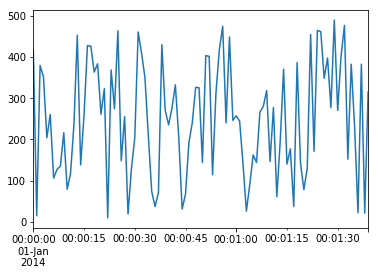

In [43]:
ts.plot()

In [18]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

In [9]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [10]:
# Pandas plot function will print with labels as default

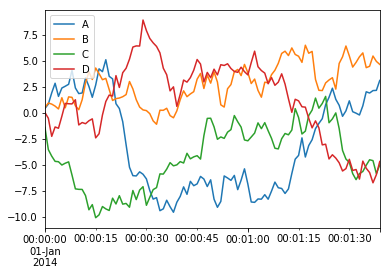

In [41]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

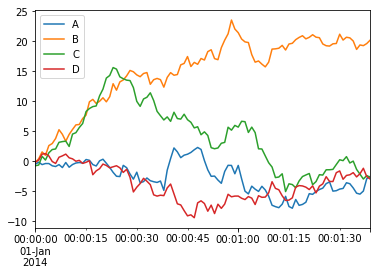

In [40]:
#df.ix[5].plot(kind='bar'); plt.axhline(0, color='k')
df.plot.line()

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

In [57]:
df = pd.read_csv('../assets/dataset/syria.csv',encoding = 'utf8') #ISO-8859-1 or utf8
df

,#,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
4716,الإعلام السوري البديل - صحف ومجلات - آذار 2014...,2014-03-30 22:52:00,Syria,عنب بلدي | العدد 109 | الأحد 23 آذار 2014\n&am...,Article (مقالة),34.640186,39.049411,YES,YES,NaN
4760,ارتفاع عدد ضحايا القنص عند معبر كراج الحجز بحل...,2014-03-30 17:22:00,Syria,ارتفاع عدد ضحايا القنص عند معبر كراج الحجز بحل...,Article (مقالة),34.640186,39.049411,YES,YES,NaN
4754,خمسون قتيلاً من عناصر قوات النظام في حلب وريفه...,2014-03-30 09:22:00,Syria,تجدّد الاشتباكات في ريف اللاذقية\n\nخمسون قتيل...,Article (مقالة),34.640186,39.049411,YES,YES,NaN
4743,هااااام فيديوهات تبين الية توزيع السلل الغذائي...,2014-03-30 08:00:00,"Rif Dimashq, Syria",هاااااام # الغوطة الشرقية # ريف دمشق 30 3 2014...,"Announcement (إعلان),Relief Aid (مساعدات الإغاثة)",33.461274,36.844078,YES,YES,NaN
4734,More than 330 barrel bomb on Daraya alone,2014-03-30 07:23:00,"داريا, شارع الكازية, Hawsh al Balas, Rif Dimas...",** After the excessive air strikeswith explosi...,"Aggregate Report (تقرير إجمالي),Summary Report...",33.454121,36.229229,YES,YES,NaN
4721,مجلس قيادة الثورة في ريف دمشق - المكتب الإعلام...,2014-03-29 20:41:00,"Rif Dimashq, Syria",مجلس قيادة الثورة في ريف دمشق - المكتب الإعلام...,"Aggregate Report (تقرير إجمالي),Killed (قُتِل)...",33.461274,36.844078,YES,YES,NaN
4755,مقتل عشرين من عناصر قوات النظام في حلب 2014/0...,2014-03-29 16:59:00,Syria,مقتل عشرين من عناصر قوات النظام في حلب\n\nدفعة...,Article (مقالة),34.640186,39.049411,YES,YES,NaN
4733,مجلس قيادة الثورة في ريف دمشق || خروج الوفد ال...,2014-03-29 14:37:00,"Rif Dimashq, Syria",مجلس قيادة الثورة في ريف دمشق || خروج الوفد ال...,"Eyewitness Report (تقريرشاهد عيان),Announcemen...",33.461274,36.844078,YES,YES,NaN
4737,هااااااااااااام دخول المساعدات الانسانية الى ا...,2014-03-29 14:28:00,"Rif Dimashq, Syria",عــــ الغوطة الشرقية المحاصرة ــــاجل : ريف ...,Relief Aid (مساعدات الإغاثة),33.461274,36.844078,YES,YES,NaN
4732,تفاصيل استهداف مدينة حرستا بالغازات السامة يوم...,2014-03-29 11:20:00,"Hirista, Rif Dimashq, Syria",مجلس قيادة الثورة في ريف دمشق | الغوطة الشرقية...,"Aggregate Report (تقرير إجمالي),Chemical Poiso...",33.558874,36.362652,YES,NO,NaN


#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas